# Random Sample imputation

Random sample imputation takes random value from data set and repalce the NAN value with this random value 

We should use when the data misses completely at random

In [7]:
import pandas as pd
df = pd.read_csv("titanic.csv",usecols=['Fare','Age','Survived'])


In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df['Age'].isnull().sum()

177

In [21]:
Median = df.Age.median()

28.0

In [55]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [60]:
def handel(df,variable,Median):
    df[variable+'_Median'] = df[variable].fillna(Median)
    df[variable+'_Random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_Random'] = random_sample

In [61]:
handel(df,'Age',Median)

In [63]:
df.head(20)

,Survived,Age,Fare,Age_Median,Age_Random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,0.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


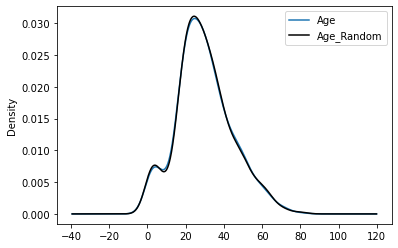

In [72]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = plt.subplot(111)
df['Age'].plot(kind = 'kde',ax=ax)
df.Age_Random.plot(kind = 'kde',ax=ax,color = 'black')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')


##### Advantage

1. there is very less distortion when compared to median
2. easy to implement

##### Disadvantage

Random sample imputaion wont give good result always. since the value is random

# Capturing NAN values with new feature

 It works well if the datas are not missing completely at random

In [76]:
import pandas as pd
import numpy as np
df = pd.read_csv("titanic.csv",usecols=['Fare','Age','Survived'])

In [77]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [78]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [80]:
#it creates a aditional feature to record the NAN values in Age feature, if the Age feature NAN values are replaced by other mean or median technique
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [82]:
df.Age.median()

28.0

In [88]:
#inplace permenatly replace the Age features Nan value

df['Age'].fillna(df.Age.median(),inplace = True)

In [89]:
df.head(30)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantage
1. Easy to implement
2. Use to capture the importance of missing values
#### Disadvantage
1. it adds more extra features if the feature having NAN value is more(eg: table with 100 features having nan values will add 100 more feature)
(which leads to curse of dimentionality)

# End of distribution Imputation

In [150]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Fare','Age','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [151]:
%matplotlib inline

<AxesSubplot:>

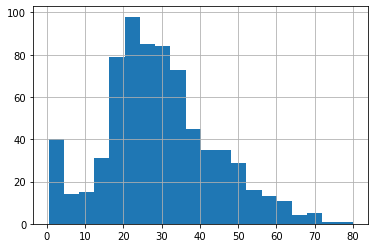

In [152]:
# we will take the end of the distribution an repalce

df.Age.hist(bins = 20)

In [153]:
#this gives mean of the central value

df.Age.mean()

29.69911764705882

In [154]:
#if we need to get the value as he far end by which can be got by third standard normal distribution i.e

extreme = df.Age.mean()+3*df.Age.std()

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

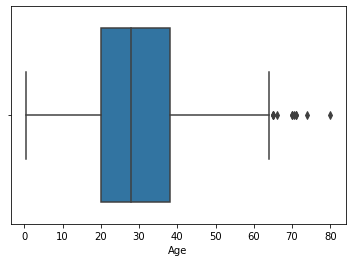

In [155]:
#far end are the outliers

import seaborn as sns
sns.boxplot('Age',data=df)

In [156]:
def end_of_dist(df,variable,median,extreme):
    df[variable+'_End_Distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [157]:
end_of_dist(df,'Age',df.Age.median(),extreme)

In [158]:
df.head()

,Survived,Age,Fare,Age_End_Distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_End_Distribution'>

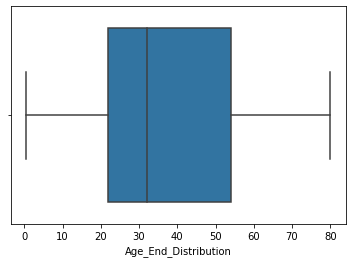

In [161]:
#we can see the outliers are removed

sns.boxplot('Age_End_Distribution',data=df)

<AxesSubplot:>

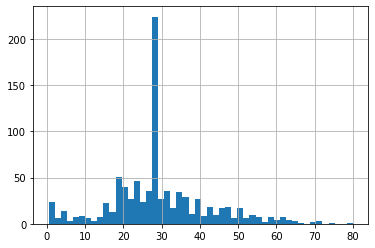

In [162]:
#Age feature which replaces meadian value made huge distortion at the middle of the graph
df.Age.hist(bins = 50)

<AxesSubplot:>

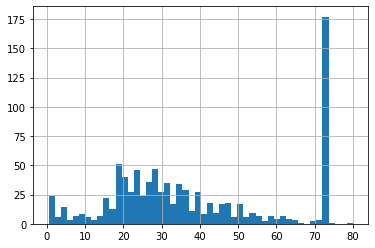

In [165]:
#But the distortion is shifted to the last end in the Age_end_distribution which uses end of distribution
df.Age_End_Distribution.hist(bins = 50) 